Pruning is of two types:

1. Post Pruning(Backward Pruning): Full tree is generated and then the non-
significant branches are pruned/removed. Cross validation is performed at
every step to check whether addition of the new branch leads to increase in
accuracy. If not the branch is converted to leaf node.

2. Pre Pruning(Forward Pruning): This approach stops the non-significant
branches from generating. It terminates the generation of new branch based
on the given condition.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./DataSet/heart failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [8]:
(96/(96+203))*100

32.10702341137124

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

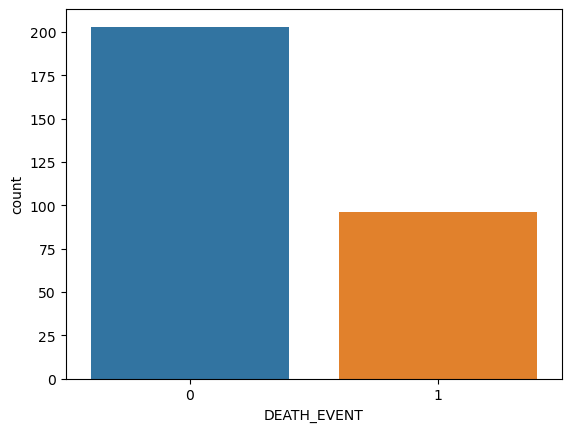

In [9]:
sns.countplot(x='DEATH_EVENT',data=df)

<AxesSubplot:xlabel='anaemia', ylabel='count'>

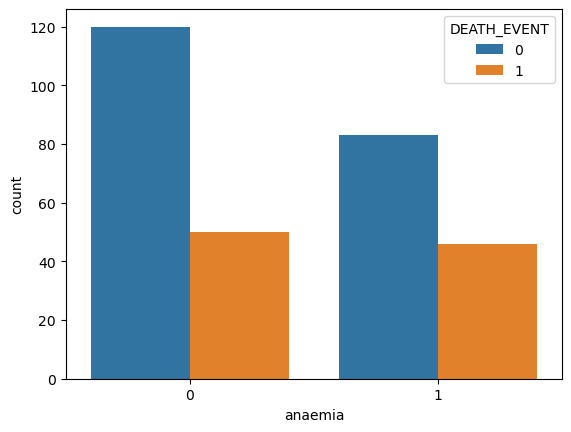

In [10]:
sns.countplot(x = 'anaemia', hue='DEATH_EVENT', data=df)

In [12]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

<AxesSubplot:xlabel='count', ylabel='anaemia'>

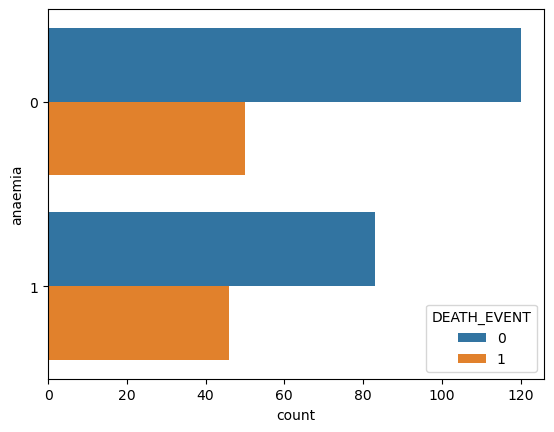

In [13]:
sns.countplot(y = 'anaemia', hue='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

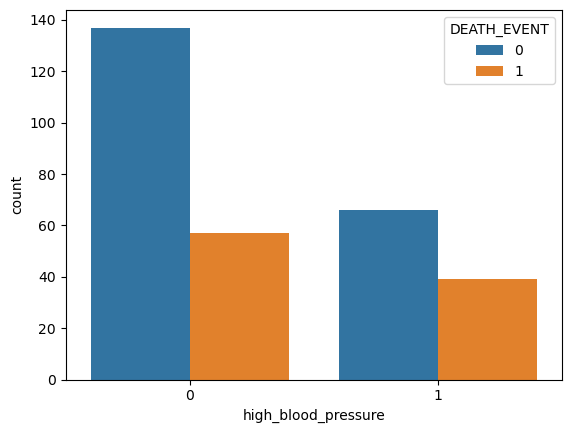

In [14]:
sns.countplot(x = 'high_blood_pressure', hue='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='smoking', ylabel='count'>

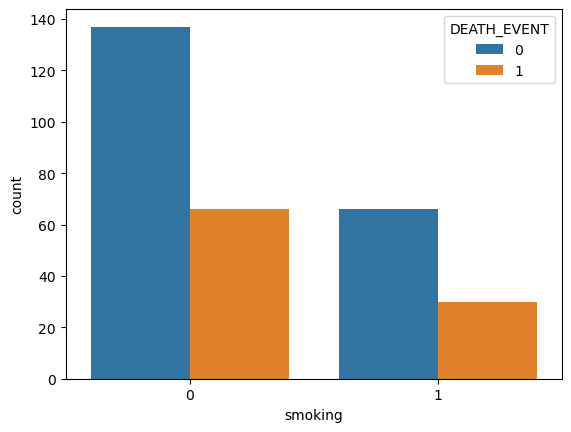

In [15]:
sns.countplot(x = 'smoking', hue='DEATH_EVENT', data=df)

In [16]:
#https://archive.ics.uci.edu/ml/index.php

In [17]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [18]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot:>

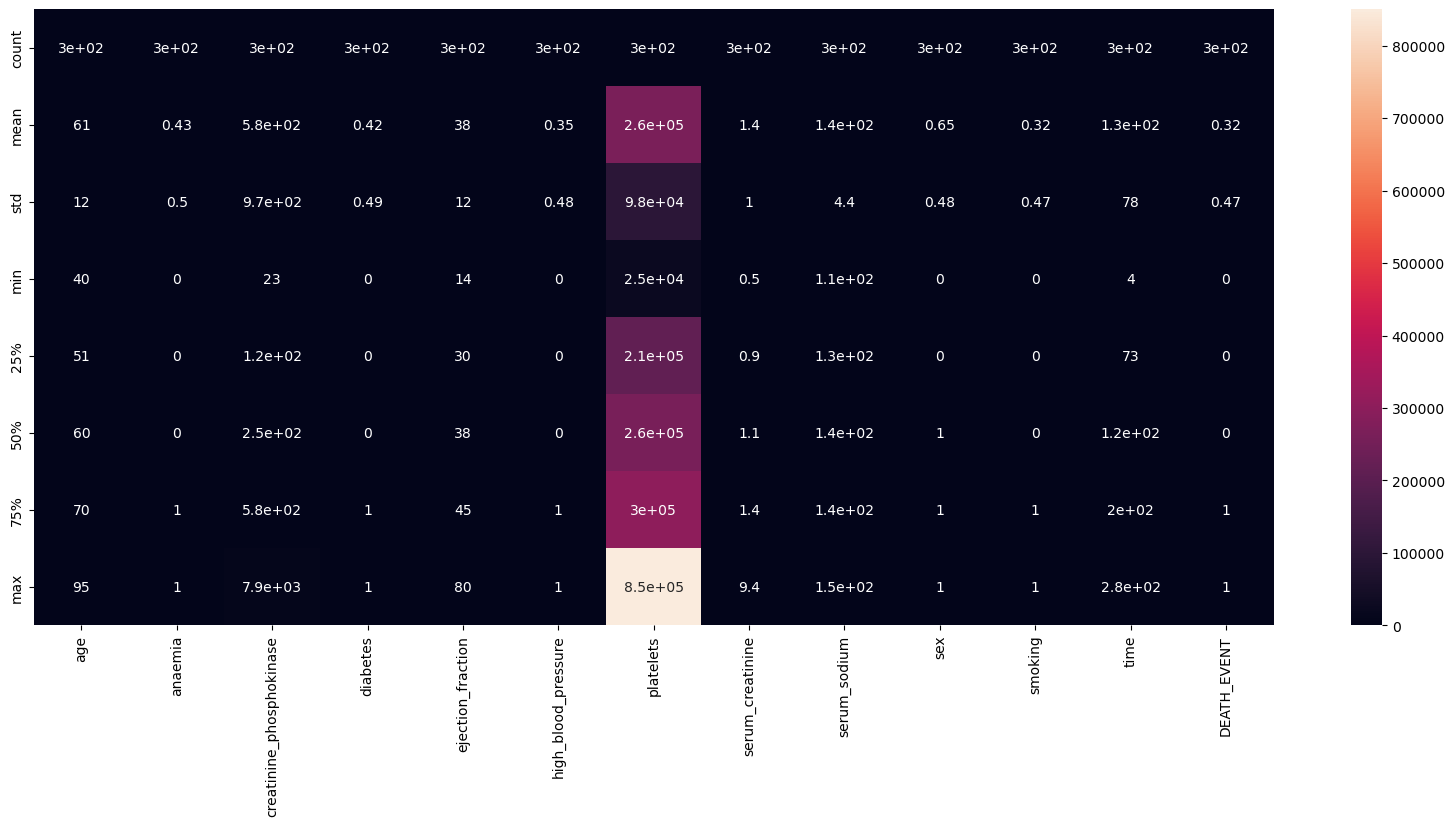

In [19]:
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(), annot=True)

<AxesSubplot:>

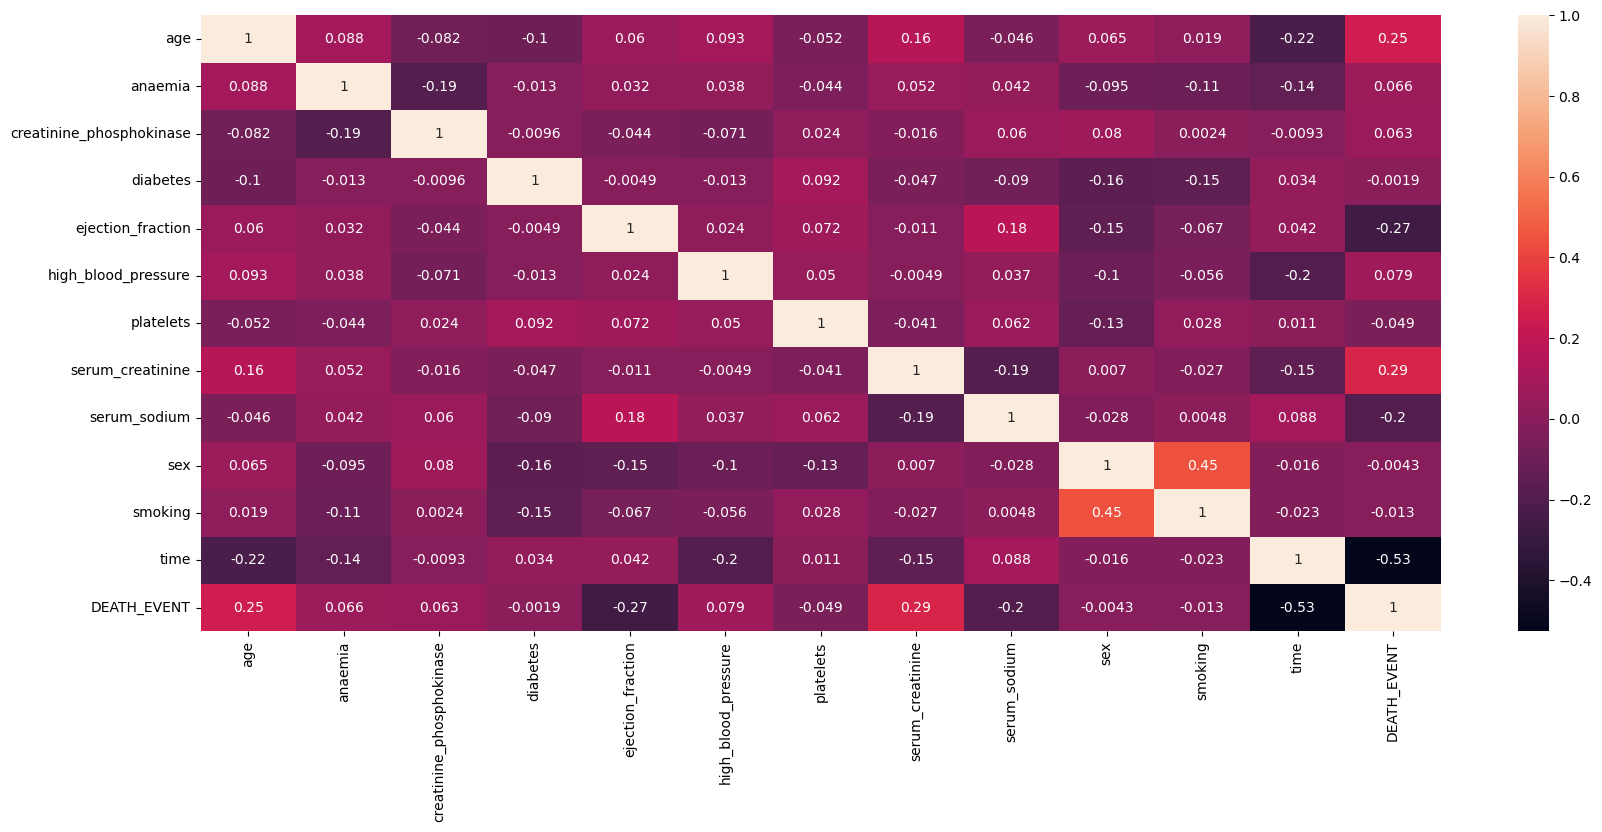

In [21]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True)

In [17]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [28]:
import plotly.express as pl
pl.scatter_3d(df,x='anaemia',y='creatinine_phosphokinase',z='diabetes',color='creatinine_phosphokinase')

In [32]:
pl.scatter_3d(df,x='ejection_fraction',y='creatinine_phosphokinase',z='high_blood_pressure',color='anaemia')

In [33]:
X = df.drop('DEATH_EVENT', axis=1)

In [34]:
Y = df['DEATH_EVENT']

In [35]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [36]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

# Start Again

In [38]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, random_state=42, test_size=.30)
print(xtrain.shape)
print(xtest.shape)

(209, 12)
(90, 12)


# Decision Tree Classifier

In [41]:
# using decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [53]:
print(f"Training accuracy :{clf.score(xtrain,ytrain)*100}")
print(f'Test Accuracy : {clf.score(xtest,ytest)*100}')
print(f'Predicted Test Value : {clf.predict(xtest)}')

Training accuracy :100.0
Test Accuracy : 70.0
Predicted Test Value : [1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0
 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1]


# Score

In [54]:
from sklearn.metrics import classification_report , accuracy_score,confusion_matrix,plot_roc_curve

pred = clf.predict(xtest)
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [55]:
import numpy as np
np.array(ytest)

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [56]:
print(classification_report(pred,ytest)) # actual y = ytest  ; pred = predicted y

              precision    recall  f1-score   support

           0       0.79      0.72      0.76        58
           1       0.57      0.66      0.61        32

    accuracy                           0.70        90
   macro avg       0.68      0.69      0.68        90
weighted avg       0.71      0.70      0.70        90



In [57]:
# print(classification_report(ytest,pred)) # actual y = ytest  ; pred = predicted y

              precision    recall  f1-score   support

           0       0.72      0.79      0.76        53
           1       0.66      0.57      0.61        37

    accuracy                           0.70        90
   macro avg       0.69      0.68      0.68        90
weighted avg       0.70      0.70      0.70        90



In [58]:
confusion_matrix(ytest, pred)

array([[42, 11],
       [16, 21]], dtype=int64)

In [59]:
(43+17) / (43+17+10+20) 

0.6666666666666666

In [60]:
accuracy_score(ytest, pred)

0.7

In [61]:
tp, fn, fp, tn = confusion_matrix(ytest, pred).reshape(-1) 

In [62]:
tp

42

In [63]:
fn

11

In [64]:
tn

21

In [65]:
fp

16

# Accuracy

In [66]:
acc = (tp+tn) / (tp+tn+fp+fn)

In [67]:
acc*100

70.0

# ROC Curve

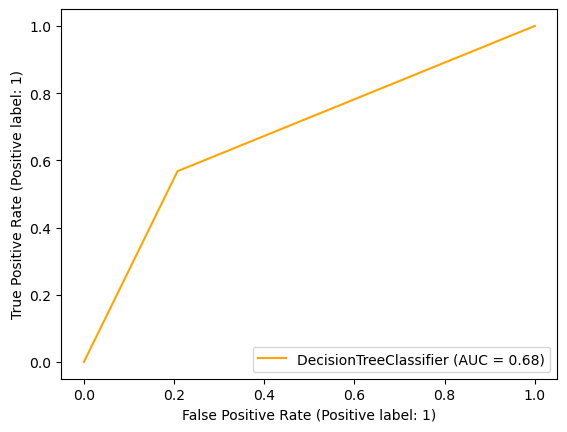

In [68]:
plot_roc_curve(clf,xtest,ytest,color = 'orange')

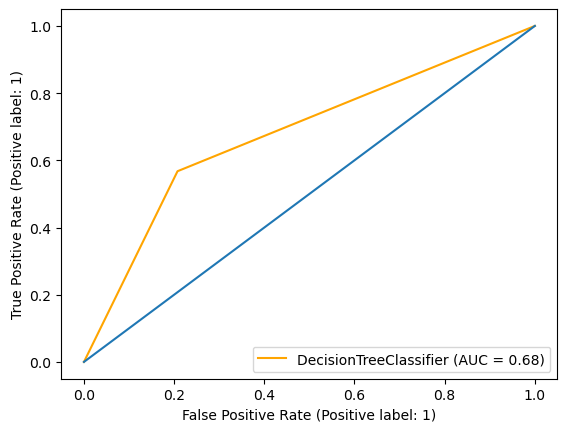

In [69]:
plot_roc_curve(clf, xtest , ytest, color='orange')
plt.plot([0,1],[0,1])

# Tree

[Text(0.4449152542372881, 0.95, 'time <= 67.5\ngini = 0.405\nsamples = 209\nvalue = [150, 59]'),
 Text(0.22033898305084745, 0.85, 'ejection_fraction <= 72.5\ngini = 0.249\nsamples = 48\nvalue = [7, 41]'),
 Text(0.1864406779661017, 0.75, 'creatinine_phosphokinase <= 109.5\ngini = 0.223\nsamples = 47\nvalue = [6, 41]'),
 Text(0.06779661016949153, 0.65, 'time <= 24.0\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.03389830508474576, 0.55, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.1016949152542373, 0.55, 'creatinine_phosphokinase <= 101.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.06779661016949153, 0.45, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.13559322033898305, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3050847457627119, 0.65, 'creatinine_phosphokinase <= 1818.5\ngini = 0.108\nsamples = 35\nvalue = [2, 33]'),
 Text(0.23728813559322035, 0.55, 'ejection_fraction <= 47.5\ngini = 0.061\nsamples = 32\nvalue = [1, 31]'),
 Text(0.2033898305

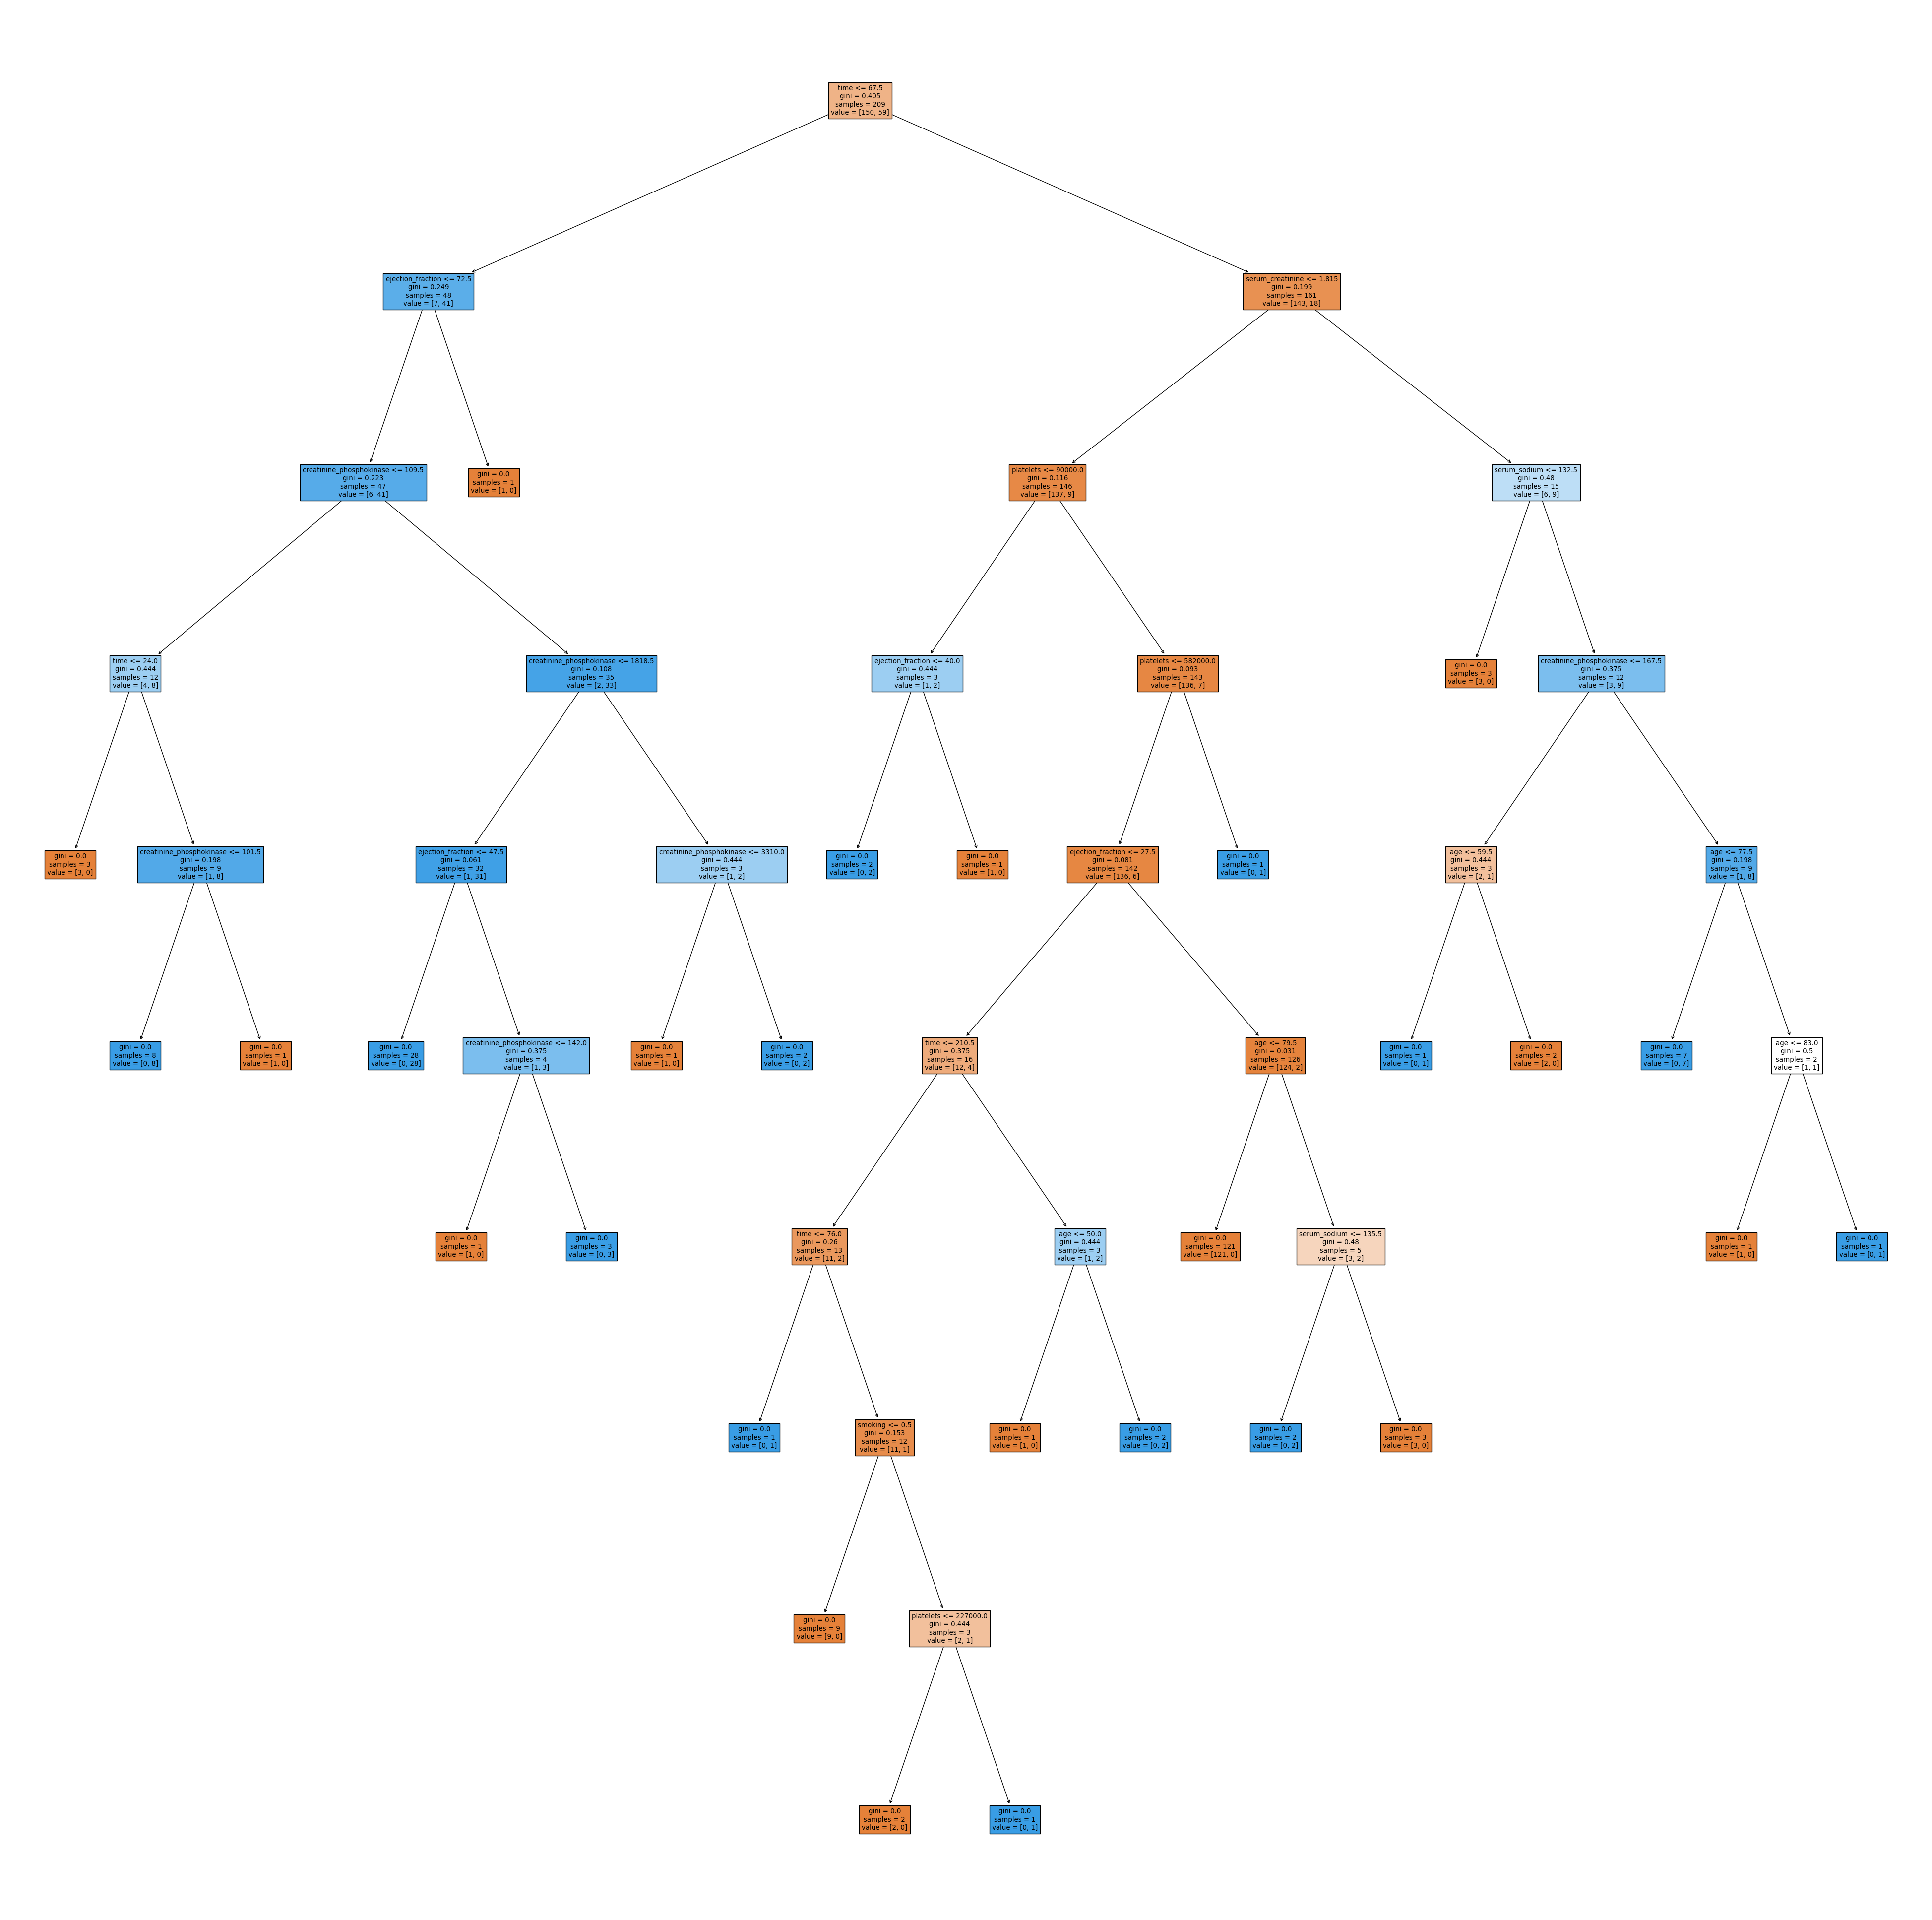

In [75]:
from sklearn import tree

plt.figure(figsize=(50,50))
tree.plot_tree(clf,filled=True , feature_names=X.columns)

# Cost complexity With Post Pruning

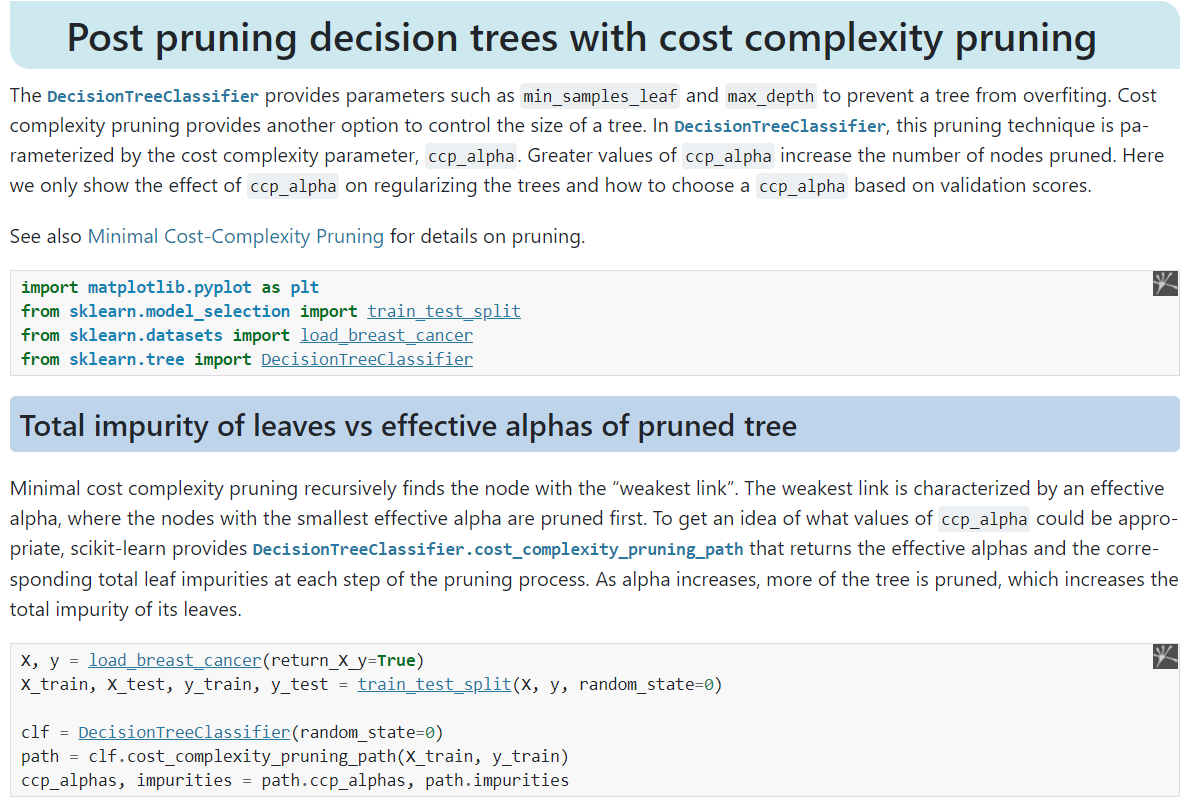

In [77]:
from IPython.display import Image
Image('./image/pruning.png')

In [78]:
# Pruning: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html 

In [ ]:
pruning_path = clf

In [48]:
pruning_path = clf.cost_complexity_pruning_path(xtrain, ytrain) # clf = DecisionTreeClassifier 
ccp_alpha_values, impurity_values = pruning_path.ccp_alphas, pruning_path.impurities

In [49]:
ccp_alpha_values

array([0.        , 0.00438596, 0.00451128, 0.00637959, 0.00637959,
       0.00637959, 0.00677831, 0.00757576, 0.00850611, 0.00874962,
       0.01022189, 0.01072915, 0.01291866, 0.03772605, 0.19500242])

In [50]:
impurity_values

array([0.        , 0.00877193, 0.02681704, 0.03319663, 0.03957621,
       0.0459558 , 0.05951242, 0.07466393, 0.08317005, 0.11816854,
       0.14883422, 0.15956337, 0.17248203, 0.21020808, 0.4052105 ])

In [51]:
clfs_list = []  # save diffrent classifiers

for x in ccp_alpha_values:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=x)
    clf.fit(xtrain, ytrain)
    clfs_list.append(clf)
    

In [52]:
clfs_list

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.004385964912280702, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00451127819548872, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006379585326953748, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006379585326953748, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006379585326953748, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006778309409888357, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.007575757575757576, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.008506113769271663, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.008749623582159468, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.01022189311662996, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.010729149812849129, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.012918660287081336, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.03772604938085644, random_state=42),

# Compare

In [53]:
train_scores = [clf.score(xtrain, ytrain) for clf in clfs_list]
test_scores = [clf.score(xtest, ytest) for clf in clfs_list]

In [54]:
train_scores

[1.0,
 0.9952153110047847,
 0.9856459330143541,
 0.9712918660287081,
 0.9712918660287081,
 0.9712918660287081,
 0.9617224880382775,
 0.9521531100478469,
 0.9473684210526315,
 0.9330143540669856,
 0.9138755980861244,
 0.9090909090909091,
 0.8947368421052632,
 0.8803827751196173,
 0.7177033492822966]

In [55]:
test_scores

[0.6777777777777778,
 0.6777777777777778,
 0.6888888888888889,
 0.6888888888888889,
 0.6888888888888889,
 0.6888888888888889,
 0.6777777777777778,
 0.6666666666666666,
 0.6666666666666666,
 0.7,
 0.7222222222222222,
 0.7333333333333333,
 0.7444444444444445,
 0.7666666666666667,
 0.5888888888888889]

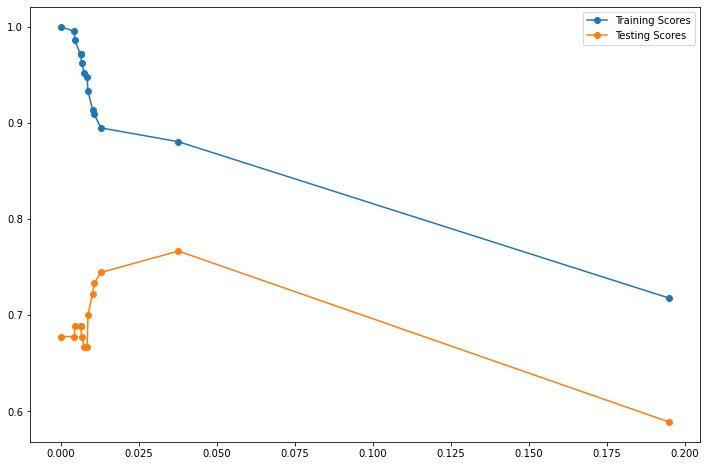

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8)) # define the size of plot

plt.plot(ccp_alpha_values, train_scores, '-o', label='Training Scores')
plt.plot(ccp_alpha_values, test_scores, '-o', label='Testing Scores')

plt.legend()

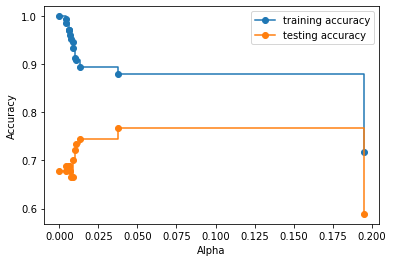

In [57]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

ax.plot(ccp_alpha_values, train_scores, marker='o', label="training accuracy", drawstyle="steps-post")
ax.plot(ccp_alpha_values, test_scores, marker='o', label="testing accuracy", drawstyle="steps-post")
ax.legend()


In [58]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.050)

In [59]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.05, random_state=42)

In [60]:
pred=clf.predict(xtest)

In [61]:
accuracy_score(ytest, pred)

0.7666666666666667

[Text(0.5, 0.75, 'time <= 67.5\ngini = 0.405\nsamples = 209\nvalue = [150, 59]'),
 Text(0.25, 0.25, 'gini = 0.249\nsamples = 48\nvalue = [7, 41]'),
 Text(0.75, 0.25, 'gini = 0.199\nsamples = 161\nvalue = [143, 18]')]

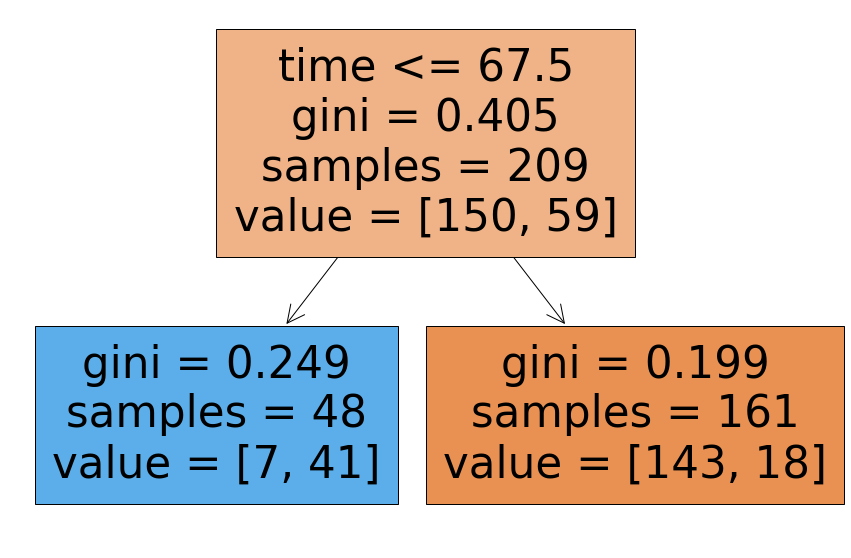

In [62]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True, feature_names = X.columns)

In [63]:
clf.score(xtrain, ytrain)

0.8803827751196173